In [9]:
# Dependencies and setup
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm
from scipy.special import boxcox1p
from sklearn.preprocessing import Imputer
%matplotlib inline

In [10]:
# Set maximum rows to a high number
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [11]:
# Load dataset
training_data = pd.read_csv("01-raw_data/train.csv",index_col=0)

In [12]:
training_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Investigating the dependent variable

* The price of homes in Ames, IA tends to be within $120K - 220K
* The dependent variable (listing price) is right skewed, which will need to be adjusted prior to completing the regression
* A logarithmic transformation significantly improves the normality issue

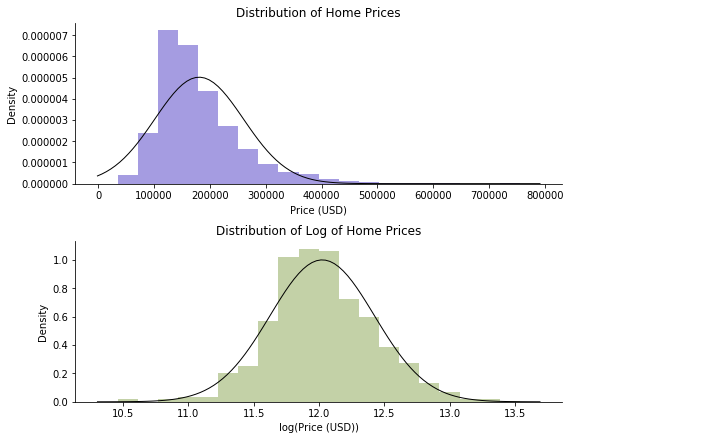

In [25]:
# Establish figure and grid to create two charts in the same image
home_prices_fig = plt.figure(constrained_layout=True,figsize=(10,6))
home_prices_grid = gridspec.GridSpec(ncols=3,nrows=2,figure=home_prices_fig)

# Create histogram for housing price data
ax1 = home_prices_fig.add_subplot(home_prices_grid[0,:2])
ax1.set_title("Distribution of Home Prices")
mu, std = norm.fit(training_data["SalePrice"])
training_data["SalePrice"].hist(bins=20,color="slateblue",density=True,alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)

plt.xlabel("Price (USD)")
plt.ylabel("Density")
plt.grid(False)
sns.despine()

# Create histogram for log of housing price data
ax2 = home_prices_fig.add_subplot(home_prices_grid[1, :2])
ax2.set_title("Distribution of Log of Home Prices")
mu, std = norm.fit(np.log(training_data["SalePrice"]))
(np.log(training_data["SalePrice"])).hist(bins=20,color="olivedrab",density=True,alpha=0.4)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=1)

plt.xlabel("log(Price (USD))")
plt.ylabel("Density")
plt.grid(False)
sns.despine()

# Display the charts
plt.show()

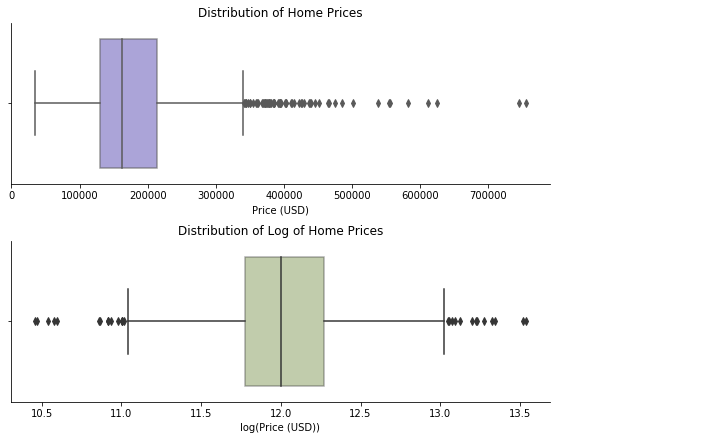

In [14]:
# Establish figure and grid to create two charts in the same image
home_prices_fig = plt.figure(constrained_layout=True,figsize=(10,6))
home_prices_grid = gridspec.GridSpec(ncols=3,nrows=2,figure=home_prices_fig)

# Create boxplot of home price data
ax1 = home_prices_fig.add_subplot(home_prices_grid[0, :2])
ax1.set_title("Distribution of Home Prices")
sns.boxplot(training_data.SalePrice, orient="h", ax=ax1, color="slateblue", boxprops=dict(alpha=.6))
plt.xlabel("Price (USD)")
plt.grid(False)
sns.despine()

# Create boxplot of log of home price data
ax2 = home_prices_fig.add_subplot(home_prices_grid[1, :2])
ax2.set_title("Distribution of Log of Home Prices")
sns.boxplot(np.log(training_data.SalePrice), orient="h", ax=ax2, color="olivedrab", boxprops=dict(alpha=.4))
plt.xlabel("log(Price (USD))")
plt.grid(False)
sns.despine()

# Display the charts
plt.show()

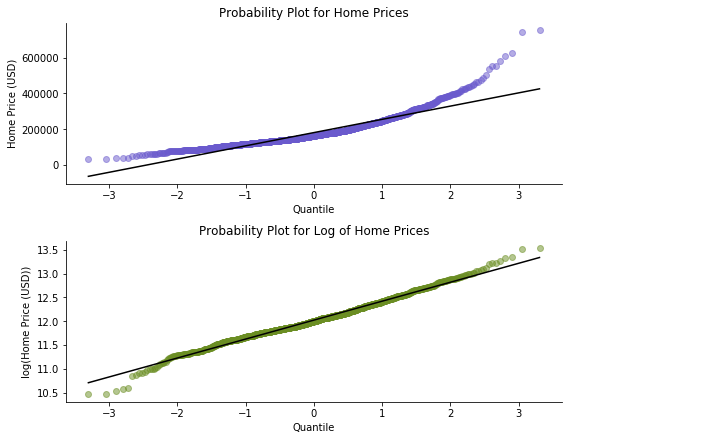

In [26]:
# Establish figure and grid to create two charts in the same image
home_prices_fig = plt.figure(constrained_layout=True,figsize=(10,6))
home_prices_grid = gridspec.GridSpec(ncols=3,nrows=2,figure=home_prices_fig)

# Create QQ Plot of home price data
ax1 = home_prices_fig.add_subplot(home_prices_grid[0, :2])
stats.probplot(training_data["SalePrice"], plot = ax1)
# Change titles
plt.title("Probability Plot for Home Prices")
plt.xlabel("Quantile")
plt.ylabel("Home Price (USD)")
# Change line and marker colors
ax1.get_lines()[0].set_markeredgecolor('slateblue')
ax1.get_lines()[0].set_markerfacecolor('slateblue')
ax1.get_lines()[0].set_alpha(0.5)
ax1.get_lines()[1].set_color('black')
# Remove gridlines and chart outline
plt.grid(False)
sns.despine()

# Create QQ Plot of log of home price data
ax2 = home_prices_fig.add_subplot(home_prices_grid[1, :2])
stats.probplot(np.log(training_data.SalePrice), plot = ax2)
# Change titles
plt.title("Probability Plot for Log of Home Prices")
plt.xlabel("Quantile")
plt.ylabel("log(Home Price (USD))")
# Change line and marker colors
ax2.get_lines()[0].set_markeredgecolor('olivedrab')
ax2.get_lines()[0].set_markerfacecolor('olivedrab')
ax2.get_lines()[0].set_alpha(0.5)
ax2.get_lines()[1].set_color('black')
# Remove gridlines and chart outline
plt.grid(False)
sns.despine()

# Display the charts
plt.show()

In [16]:
print("------------------------------------------------------------------")
print(f"Skew of the housing price data is: {round(training_data['SalePrice'].skew(),3)}")
print(f"Skew of the log of housing price data is: {round(np.log(training_data['SalePrice']).skew(),3)}")
print("------------------------------------------------------------------")
print("Logarithmic transformation significantly improves the skew issue")
print("------------------------------------------------------------------")

------------------------------------------------------------------
Skew of the housing price data is: 1.883
Skew of the log of housing price data is: 0.121
------------------------------------------------------------------
Logarithmic transformation significantly improves the skew issue
------------------------------------------------------------------


## Investigating Numeric Independent Variables